# Setting up the beta version of PySketcher

## Requirements

1. Install pysketcher (`pip install pysketcher`)

In [1]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!


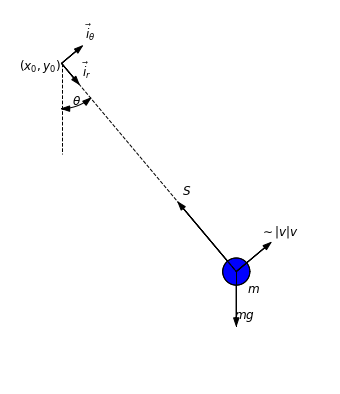

In [3]:
import logging

import numpy as np

import pysketcher as ps
from pysketcher.backend.matplotlib import MatplotlibBackend

H = 7.0
W = 6.0

logging.basicConfig(level=logging.INFO)
# drawing_tool.set_grid(True)

L = 5 * H / 7  # length
P = ps.Point(W / 6, 0.85 * H)  # rotation point
a = 2 * np.pi / 9  # angle

vertical = ps.Line(P, P - ps.Point(0, L))
path = ps.Arc(P, L, -np.pi / 2, a)
theta = ps.ArcWithText(r"$\theta$", P, L / 4, -np.pi / 2, a, text_spacing=1 / 30.0)

mass_pt = path.end
rod = ps.Line(P, mass_pt)

mass = ps.Circle(mass_pt, L / 20.0)

rod_vec = rod.end - rod.start
unit_rod_vec = rod_vec.unit_vector()
mass_symbol = ps.Text("$m$", mass_pt + unit_rod_vec * (L / 10.0))

length = ps.DistanceWithText("$L$", P, mass_pt)
# Displace length indication
length = length.translate(rod_vec.normal() * (L / 15))
gravity = ps.Gravity(start=P + ps.Point(0.8 * L, 0), length=L / 3)


def set_dashed_thin_blackline(*objects: ps.Shape):
    """Set linestyle of objects to dashed, black, width=1."""
    for obj in objects:
        obj.set_line_style(ps.Style.LineStyle.DASHED)
        obj.set_line_color(ps.Style.Color.BLACK)
        obj.set_line_width(1)


set_dashed_thin_blackline(vertical, path)
theta.style.arrow = ps.Style.ArrowStyle.DOUBLE
mass.style.fill_color = ps.Style.Color.BLUE

model = ps.Composition(
    {
        "vertical": vertical,
        "path": path,
        "theta": theta,
        "rod": rod,
        "body": mass,
        "m": mass_symbol,
        "g": gravity,
        "L": length,
    }
)

fig = ps.Figure(0.0, W, 0.0, H, backend=MatplotlibBackend)
fig.add(model)
#fig.show()

vertical2 = ps.Line(rod.start, rod.start + ps.Point(0.0, -L / 3.0))
set_dashed_thin_blackline(vertical2)
set_dashed_thin_blackline(rod)
angle2 = ps.ArcWithText(
    r"$\theta$", rod.start, L / 6, -np.pi / 2, a, text_spacing=1 / 30.0
)
angle2.style.arrow = ps.Style.ArrowStyle.DOUBLE

mg_force = ps.Force(
    "$mg$",
    mass_pt,
    mass_pt + ps.Point(0.0, -L / 5.0),
    text_position=ps.ArrowWithText.TextPosition.END,
)
rod_force = ps.Force(
    "$S$",
    mass_pt,
    mass_pt - rod_vec.unit_vector() * (L / 3.0),
    text_position=ps.ArrowWithText.TextPosition.END,
)

mass.style.fill_color = ps.Style.Color.BLUE

body_diagram_shapes = {
    "$mg$": mg_force,
    "S": rod_force,
    "rod": rod,
    "vertical": vertical2,
    "theta": angle2,
    "body": mass,
    "m": mass_symbol,
}

air_force = ps.Force(
    r"${\sim}|v|v$",
    mass_pt,
    mass_pt + rod_vec.normal() * (L / 6.0),
    text_position=ps.ArrowWithText.TextPosition.END,
    # spacing = Point(0.04, 0.005),
)

body_diagram_shapes["air"] = air_force

x0y0 = ps.Text("$(x_0,y_0)$", P + ps.Point(-0.4, -0.1))

ir = ps.Force(
    r"$\vec{i}_r$",
    P,
    P + rod_vec.unit_vector() * (L / 10.0),
    text_position=ps.ArrowWithText.TextPosition.END,
)

ith = ps.Force(
    r"$\vec{i}_{\theta}$",
    P,
    P + rod_vec.normal() * (L / 10.0),
    text_position=ps.ArrowWithText.TextPosition.END,
)

body_diagram_shapes["ir"] = ir
body_diagram_shapes["ith"] = ith
body_diagram_shapes["origin"] = x0y0

fig.erase()
body_diagram = ps.Composition(body_diagram_shapes)
fig.add(body_diagram)
# drawing_tool.display('Free body diagram')
#fig.show()

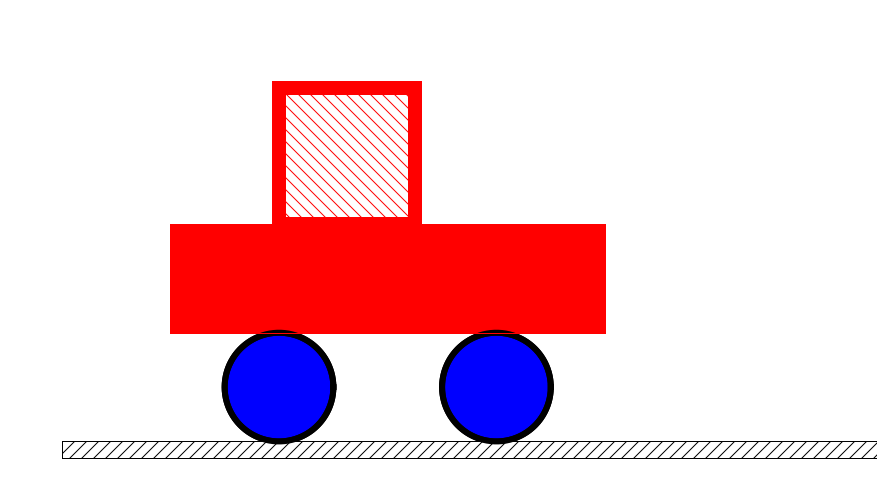

In [4]:
import pysketcher as ps
from pysketcher.backend.matplotlib import MatplotlibBackend

R = 1  # radius of wheel
L = 4  # distance between wheels
H = 2  # height of vehicle body
w_1 = 5  # position of front wheel

wheel1 = (
    ps.Circle(ps.Point(w_1, R), R).set_fill_color(ps.Style.Color.BLUE).set_line_width(6)
)
wheel2 = wheel1.translate(ps.Point(L, 0))
under = ps.Rectangle(ps.Point(w_1 - 2 * R, 2 * R), 2 * R + L + 2 * R, H)
under.style.fill_color = ps.Style.Color.RED
under.style.line_color = ps.Style.Color.RED
over = ps.Rectangle(ps.Point(w_1, 2 * R + H), 2.5 * R, 1.25 * H).set_fill_color(
    ps.Style.Color.WHITE
)
over.style.line_width = 14
over.style.line_color = ps.Style.Color.RED
over.style.fill_pattern = ps.Style.FillPattern.UP_RIGHT_TO_LEFT

ground = ps.Wall([ps.Point(w_1 - L, 0), ps.Point(w_1 + 3 * L, 0)], -0.3 * R)
ground.style.fill_pattern = ps.Style.FillPattern.UP_LEFT_TO_RIGHT

model = ps.Composition(
    {"wheel1": wheel1, "wheel2": wheel2, "under": under, "over": over, "ground": ground}
)

fig = ps.Figure(0, w_1 + 2 * L + 3 * R, -1, 2 * R + 3 * H, backend=MatplotlibBackend)
fig.add(model)

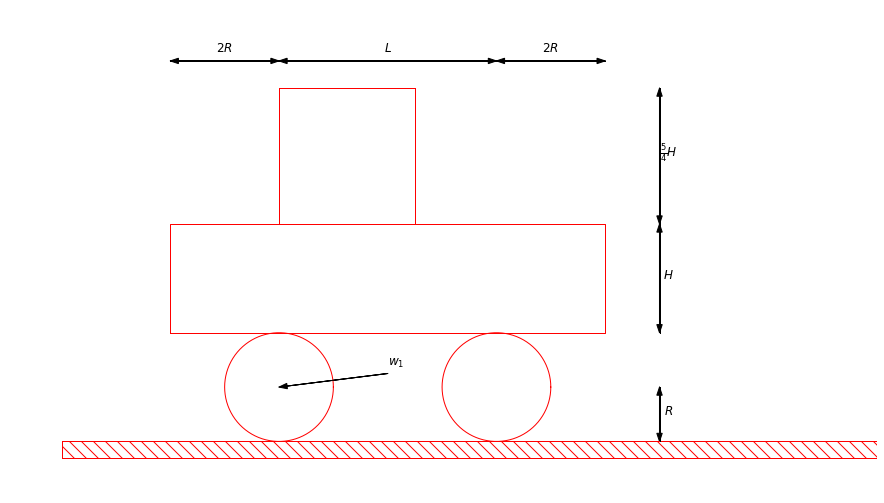

In [5]:
import pysketcher as ps
from pysketcher.backend.matplotlib import MatplotlibBackend

R = 1  # radius of wheel
L = 4  # distance between wheels
H = 2  # height of vehicle body
w_1 = 5  # position of front wheel

# TODO : draw grids
# drawing_tool.set_grid(True)

c = ps.Point(w_1, R)

wheel1 = ps.Circle(c, R)
wheel2 = wheel1.translate(ps.Point(L, 0))
under = ps.Rectangle(ps.Point(w_1 - 2 * R, 2 * R), 2 * R + L + 2 * R, H)
over = ps.Rectangle(ps.Point(w_1, 2 * R + H), 2.5 * R, 1.25 * H).set_fill_color(
    ps.Style.Color.WHITE
)
ground = ps.Wall([ps.Point(w_1 - L, 0), ps.Point(w_1 + 3 * L, 0)], -0.3 * R)
ground.style.fill_pattern = ps.Style.FillPattern.UP_RIGHT_TO_LEFT

vehicle = ps.Composition(
    {"wheel1": wheel1, "wheel2": wheel2, "under": under, "over": over, "ground": ground}
)

vehicle.style.line_color = ps.Style.Color.RED

wheel1_dim = ps.ArrowWithText("$w_1$", c + ps.Point(2, 0.25), c)
hdp = w_1 + L + 3 * R  # horizontal dimension position
R_dim = ps.DistanceWithText("$R$", ps.Point(hdp, 0), ps.Point(hdp, R))
H_dim = ps.DistanceWithText("$H$", ps.Point(hdp, 2 * R), ps.Point(hdp, 2 * R + H))
H2_dim = ps.DistanceWithText(
    "$\\frac{5}{4}H$", ps.Point(hdp, 2 * R + H), ps.Point(hdp, 2 * R + (9 / 4) * H)
)

vdp = 2 * R + H + 3 / 2 * H
R2_dim = ps.DistanceWithText("$2R$", ps.Point(w_1 - 2 * R, vdp), ps.Point(w_1, vdp))
L_dim = ps.DistanceWithText("$L$", ps.Point(w_1, vdp), ps.Point(w_1 + L, vdp))
R3_dim = ps.DistanceWithText(
    "$2R$", ps.Point(w_1 + L, vdp), ps.Point(w_1 + L + 2 * R, vdp)
)

dimensions = ps.Composition(
    {
        "wheel1_dim": wheel1_dim,
        "R_dim": R_dim,
        "H_dim": H_dim,
        "H2_dim": H2_dim,
        "R2_dim": R2_dim,
        "L_dim": L_dim,
        "R3_dim": R3_dim,
    }
)

model = ps.Composition({"vehicle": vehicle, "dimensions": dimensions})

figure = ps.Figure(0, w_1 + 2 * L + 3 * R, -1, 2 * R + 3 * H, backend=MatplotlibBackend)
figure.add(model)

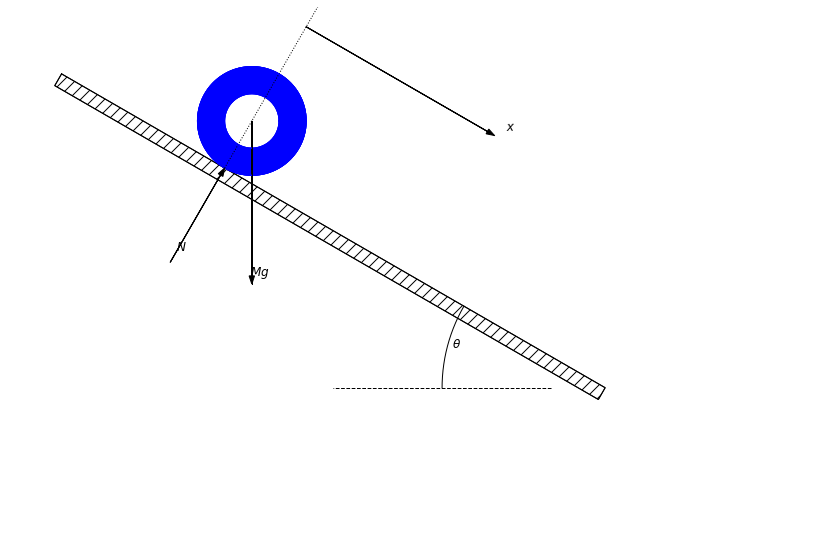

In [6]:
import time

import numpy as np

from pysketcher import (
    ArcWithText,
    Axis,
    Circle,
    Figure,
    Force,
    Gravity,
    Line,
    Point,
    Shape,
    Style,
    Wall,
)
from pysketcher.backend.matplotlib import MatplotlibBackend
from pysketcher.composition import Composition

theta = np.pi / 6
L = 10.0
a = 1.0
x_min = 0.0
y_min = -3.0

B = Point(a + L, 0)
A = Point(a, np.tan(theta) * L)

wall = Wall([A, B], thickness=-0.25)
wall.style.fill_pattern = Style.FillPattern.UP_LEFT_TO_RIGHT

angle = ArcWithText(
    r"$\theta$", center=B, radius=3, start_angle=np.pi - theta, arc_angle=theta
)
angle.style.line_color = Style.Color.BLACK
angle.style.line_width = 1

ground = Line(Point(B.x - L / 10.0, 0), Point(B.x - L / 2.0, 0))
ground.style.line_color = Style.Color.BLACK
ground.style.line_style = Style.LineStyle.DASHED
ground.style.line_width = 1

r = 1.0  # radius of wheel
help_line = Line(A, B)
x = a + 3 * L / 10.0
y = help_line(x=x)
contact = Point(x, y)
normal_vec = Point(np.sin(theta), np.cos(theta))
c = contact + normal_vec * r
outer_wheel = (
    Circle(c, r).set_line_color(Style.Color.BLUE).set_fill_color(Style.Color.BLUE)
)
hole = (
    Circle(c, r / 2.0)
    .set_line_color(Style.Color.BLUE)
    .set_fill_color(Style.Color.WHITE)
)
wheel = Composition({"outer": outer_wheel, "inner": hole})

N = Force("$N$", contact - normal_vec * 2 * r, contact, spacing=0.2)
N.style.line_color = Style.Color.BLACK

# text_alignment='left')
mg = Gravity(c, 3 * r, text="$Mg$", text_position=Gravity.TextPosition.END)

x_const = Line(contact, contact + Point(0, 4))
x_const.style.line_style = Style.LineStyle.DOTTED
x_const = x_const.rotate(-theta, contact)

x_axis = Axis(
    start=contact + normal_vec * 3.0 * r,
    length=4 * r,
    label="$x$",
    rotation_angle=-theta,
)

body = Composition({"wheel": wheel, "N": N, "mg": mg})
fixed = Composition(
    {
        "angle": angle,
        "inclined wall": wall,
        "wheel": wheel,
        "ground": ground,
        "x start": x_const,
        "x axis": x_axis,
    }
)

model = Composition({"fixed elements": fixed, "body": body})

fig = Figure(x_min, x_min + 1.5 * L, y_min, y_min + L, backend=MatplotlibBackend)

fig.add(model)
#fig.show()
time.sleep(1)
tangent_vec = Point(normal_vec.y, -normal_vec.x)

def position(t):
    """Position of center point of wheel."""
    return c + tangent_vec * 7 * t ** 2

def move(fig: Shape, t: float, dt: float = None) -> fig:
    x = position(t)
    x0 = position(t - dt)
    displacement = x - x0
    return fig["body"].translate(displacement)
